Load housing dataset and build RPART classifier:

In [ ]:
# Download data, load libraries
housing <- read.table("http://www.cse.fau.edu/~xqzhu/courses/housing.header.binary.txt",header=T,sep=",")
attach(housing)
library("rpart")
library("ROCR")

In [59]:
# Random data sampling for splititng
set.seed(1)
train <- sample(1:nrow(housing),0.8*nrow(housing))
train.set <- housing[train,]
test.set <- housing[-train,]

# Train classifier
fit.classifier <- rpart(Medv~.,method="class",data=train.set)

# Run classifier on test data
fit.pred <- predict(fit.classifier, test.set)
labels <- ifelse(fit.pred[,2]>.5,1,0)

Report Confusion matrix, TPR, FPR and Accuracy

In [60]:
# Report confusion matrix
tt <- table(test.set$Medv, labels)
tt

# Report TPR
TPR <- (tt[4][1] / (tt[4][1] + tt[3][1])) * 100
TPR

# Report FPR
FPR <- (tt[2][1] / (tt[2][1] + tt[1][1])) * 100
FPR

# Report accuracy
accuracy <- tt[1][1] + tt[4][1] / (tt[1][1] + tt[2][1] + tt[3][1] + tt[4][1])
accuracy

   labels
     0  1
  0 56  2
  1 12 32

[1] 94.11765

[1] 17.64706

[1] 56.31373

Report the ROC curve

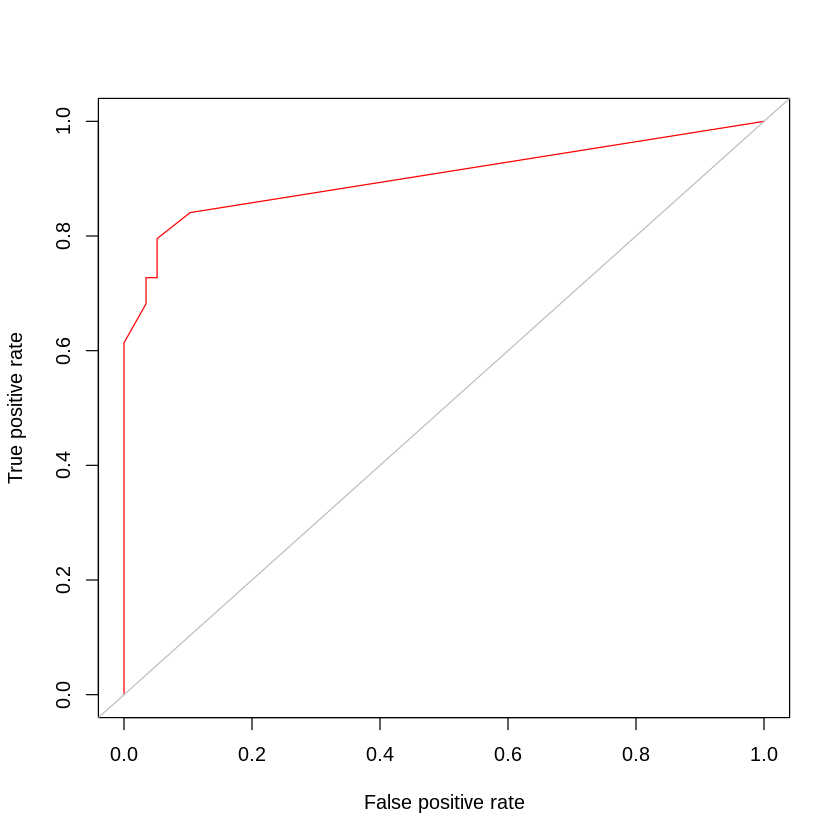

In [65]:
pred<-prediction(fit.pred[, 2], housing[-train,]$Medv)
perf<-performance(pred, "tpr", "fpr")
plot(perf, col="red")
abline(0,1, col="gray")

Report the AUC value 

In [67]:
auc<-performance(pred, "auc")
auc@y.values[[1]]

[1] 0.9024295

Create a new instance and predict Medv value

In [71]:
instance <- c(Crim=0.03, Zn=13, Indus=3.5, Chas=0.3, Nox=0.58, Rm=4.1, 
              Age=68, Dis=4.98, Rad =3, Tax=225, Ptratio=17, B=396, Lstat=7.56)

instance.predict <- predict(fit.classifier, data.frame(t(instance)))
instance.classification <- ifelse(instance.predict[,2]>.5,1,0)

[1] 0

Report posterior probability and classification result

In [72]:
result <- cbind(instance.predict[,2],instance.classification)
result

,instance.classification
0.3076923,0
